<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyzing-Your-Personal-Netflix-Data" data-toc-modified-id="Analyzing-Your-Personal-Netflix-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing Your Personal Netflix Data</a></span><ul class="toc-item"><li><span><a href="#First-Insight-into-Netflix-Data" data-toc-modified-id="First-Insight-into-Netflix-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First Insight into Netflix Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Some-Questions" data-toc-modified-id="Some-Questions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Some Questions</a></span></li><li><span><a href="#Seaborn-Again" data-toc-modified-id="Seaborn-Again-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Seaborn Again</a></span></li></ul></li></ul></div>

# Analyzing Your Personal Netflix Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## First Insight into Netflix Data

- It is possible to download your own Netflix data. Click [here](https://www.netflix.com/account/getmyinfo) to submit a request to download your data. You can actually access your Amazon and Facebook data similarly. Especially Amazon data can scare the hell out of you!


- It will look like as follows. Headers are explained in "Cover sheet".


- The one we will use is a short version provided [here](https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/).

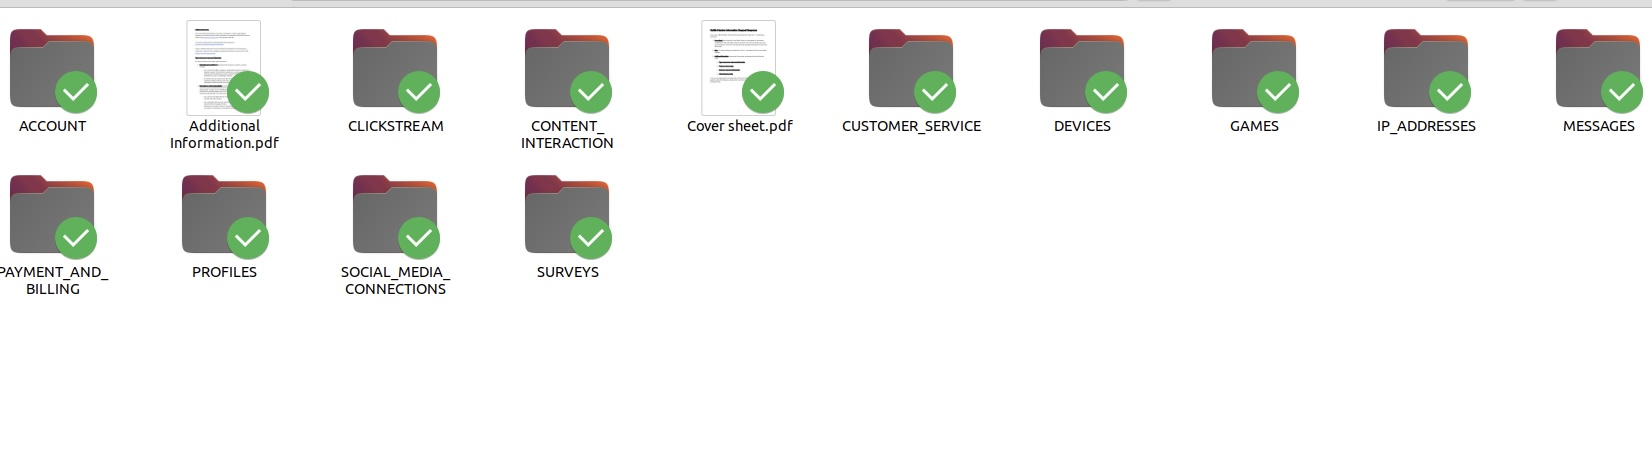

In [2]:
from IPython.display import Image
Image('figures/netflix.jpg')

In [3]:
df = pd.read_csv('datafiles/ViewingActivity-sample.csv')

In [4]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Profile Name             200 non-null    object 
 1   Start Time               200 non-null    object 
 2   Duration                 200 non-null    object 
 3   Attributes               0 non-null      float64
 4   Title                    200 non-null    object 
 5   Supplemental Video Type  0 non-null      float64
 6   Device Type              200 non-null    object 
 7   Bookmark                 200 non-null    object 
 8   Latest Bookmark          200 non-null    object 
 9   Country                  200 non-null    object 
dtypes: float64(2), object(8)
memory usage: 15.8+ KB


In [6]:
#not useful at this shape.
df.describe(include = 'all')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
count,200,200,200,0.0,200,0.0,200,200,200,200
unique,1,200,172,NaN,146,NaN,3,153,21,1
top,Charlie,2013-03-20 5:17:53,0:21:45,NaN,The Office (U.S.): Season 3: Grief Counseling ...,NaN,Mac,0:20:54,Not latest view,US (United States)
freq,200,1,4,NaN,4,NaN,175,4,173,200
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Profile Name                 0
Start Time                   0
Duration                     0
Attributes                 200
Title                        0
Supplemental Video Type    200
Device Type                  0
Bookmark                     0
Latest Bookmark              0
Country                      0
dtype: int64

## Data Cleaning 

- Drop irrelevant columns


- Convert "Start Time" and "Duration" to understandable data types.


- In Title columns, separate the show name and its episode to create a "ShowName" column.

In [8]:
#(1) Drop the irrelevant cols
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 
              'Bookmark', 'Latest Bookmark', 'Country'], axis = 1)

In [9]:
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


(2)-Start time is given in terms of Universal  Coordinated Time (UTC) format which is **YYYY-MM-DDT hh:mm:ss** Convert this to Eastern time zone

In [10]:
#Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)

# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

In [11]:
#also convert duration to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

In [12]:
df

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,0 days 00:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,0 days 00:04:51,The Invisible War
...,...,...,...
195,2013-03-01 19:45:12-05:00,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...
196,2013-03-01 18:46:16-05:00,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater
197,2013-03-01 18:21:19-05:00,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...
198,2013-03-01 17:36:48-05:00,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...


In [13]:
# (3) Seperate the show name and its episode
#df = df['Title'].str.split(':',expand=True)

In [14]:
ShowName = df['Title'].str.split(':').str[0]

In [15]:
df.insert(1,'ShowName',ShowName)

In [16]:
df

,Start Time,ShowName,Duration,Title
0,2013-03-20 01:17:53-04:00,Star Trek,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,Star Trek,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,Star Trek,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,The Invisible War,0 days 00:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,The Invisible War,0 days 00:04:51,The Invisible War
...,...,...,...,...
195,2013-03-01 19:45:12-05:00,Star Trek,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...
196,2013-03-01 18:46:16-05:00,Louis C.K.,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater
197,2013-03-01 18:21:19-05:00,Star Trek,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...
198,2013-03-01 17:36:48-05:00,Star Trek,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...


## Some Questions

- What is the data period?

In [17]:
df['Start Time'].max()-df['Start Time'].min()

Timedelta('18 days 08:30:44')

- Total Netflix time

In [18]:
#total netflix time
df['Duration'].sum()

Timedelta('2 days 17:23:06')

- Which shows and movies watched in this time period?

In [19]:
show_names  = df['ShowName'].unique()
print(show_names)

['Star Trek' 'The Invisible War' 'The Office (U.S.)' 'Archer' '30 for 30'
 'Buffy the Vampire Slayer' 'Louis C.K.']


- How many hours did he spend on each show/movie?

In [20]:
#(1)
show_list = df['ShowName'].unique()
total_hours = {}
for show in show_list:
    time = df['Duration'][df['ShowName']== show].sum()
    total_hours[show] = round(time.seconds/3600,1)

total_hours

{'Star Trek': 20.0,
 'The Invisible War': 0.9,
 'The Office (U.S.)': 15.0,
 'Archer': 3.3,
 '30 for 30': 0.4,
 'Buffy the Vampire Slayer': 0.8,
 'Louis C.K.': 1.0}

In [21]:
#(2)
#get total view hours with 'groupby'
view_totals = df.groupby(['ShowName'])['Duration'].sum()
view_totals = round(view_totals.dt.total_seconds()/3600,2)
print(view_totals)



ShowName
30 for 30                    0.40
Archer                       3.26
Buffy the Vampire Slayer     0.83
Louis C.K.                   0.97
Star Trek                   20.03
The Invisible War            0.88
The Office (U.S.)           39.01
Name: Duration, dtype: float64


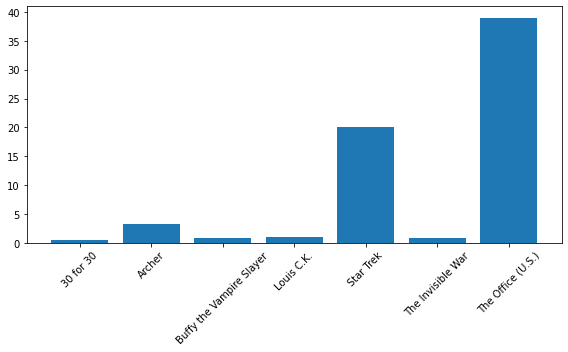

In [22]:
#let's plot
plt.figure(figsize=(8,5))
plt.bar(view_totals.index,view_totals.values)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- Which days did he watch the Office most?

In [23]:
# Create a weekday coloumns
df['weekday'] = df['Start Time'].dt.weekday

In [24]:
#get all rows including the Office
df_office = df.loc[df['ShowName']=='The Office (U.S.)']
df_office

,Start Time,ShowName,Duration,Title,weekday
9,2013-03-18 19:25:36-04:00,The Office (U.S.),0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...,0
10,2013-03-18 19:04:22-04:00,The Office (U.S.),0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0
11,2013-03-18 18:42:50-04:00,The Office (U.S.),0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0
12,2013-03-18 18:21:52-04:00,The Office (U.S.),0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0
13,2013-03-18 18:20:53-04:00,The Office (U.S.),0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...,0
...,...,...,...,...,...
152,2013-03-08 21:35:43-05:00,The Office (U.S.),0 days 00:00:55,The Office (U.S.): Season 7: Andy's Play (Epis...,4
153,2013-03-08 19:52:42-05:00,The Office (U.S.),0 days 00:20:44,The Office (U.S.): Season 7: Andy's Play (Epis...,4
154,2013-03-08 19:29:16-05:00,The Office (U.S.),0 days 00:21:48,The Office (U.S.): Season 7: Counseling (Episo...,4
155,2013-03-08 18:45:38-05:00,The Office (U.S.),0 days 00:21:48,The Office (U.S.): Season 7: Nepotism (Episode 1),4


In [25]:
#first get value counts then sort them
office_by_day = df_office['weekday'].value_counts().sort_index()
print(office_by_day)

0    32
1    17
2    12
3     8
4    20
5    30
6    18
Name: weekday, dtype: int64


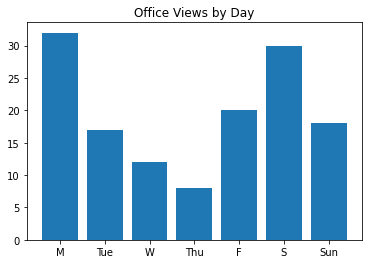

In [26]:
days = ['M','Tue','W','Thu','F','S','Sun']
plt.bar(days,office_by_day)
plt.title('Office Views by Day')
plt.show()

- Which hours did he watch most? What does the result tell us about his lifestyle in that period?

In [27]:
#create day_hours col
df['day_hours'] = df['Start Time'].dt.hour
df

,Start Time,ShowName,Duration,Title,weekday,day_hours
0,2013-03-20 01:17:53-04:00,Star Trek,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,2,1
1,2013-03-20 00:27:45-04:00,Star Trek,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,2,0
2,2013-03-20 00:05:21-04:00,Star Trek,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...,2,0
3,2013-03-19 20:20:03-04:00,The Invisible War,0 days 00:48:14,The Invisible War,1,20
4,2013-03-19 20:10:31-04:00,The Invisible War,0 days 00:04:51,The Invisible War,1,20
...,...,...,...,...,...,...
195,2013-03-01 19:45:12-05:00,Star Trek,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...,4,19
196,2013-03-01 18:46:16-05:00,Louis C.K.,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater,4,18
197,2013-03-01 18:21:19-05:00,Star Trek,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...,4,18
198,2013-03-01 17:36:48-05:00,Star Trek,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...,4,17


In [28]:
#get all rows including the Office
df_office = df.loc[df['ShowName']=='The Office (U.S.)']
#first get value counts then sort them
office_by_hours = df_office['day_hours'].value_counts().sort_index()
print(office_by_hours)

0     11
1     17
2      6
3      2
10     3
11     1
12     4
13     6
14     5
15     9
16     9
17     8
18    12
19    16
20     9
21    10
22     4
23     5
Name: day_hours, dtype: int64


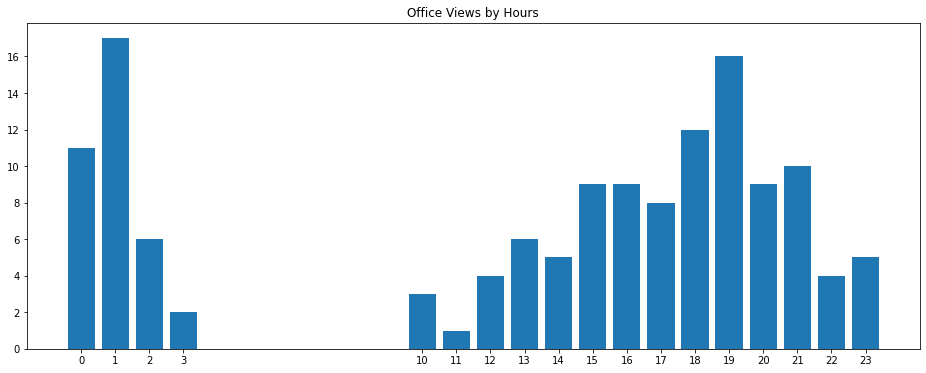

In [29]:
plt.figure(figsize=(16,6))
plt.bar(office_by_hours.index,office_by_hours)
plt.xticks(ticks=office_by_hours.index)
plt.title('Office Views by Hours')
plt.show()

- Now, find the genre of each show/movie and put them in a list in a compatible order with the show_list. 


- After that, we will use an advanced Pandas function called *apply* which will implement a given rule across 
the rows or columns.

- Idea is simple. Write a function returning the genre of a given show name and supply this function to *apply* function. It will propagate the return argument to all rows. 


- Once we have "genre" column, we can create a simple pie plot

In [30]:
show_list

array(['Star Trek', 'The Invisible War', 'The Office (U.S.)', 'Archer',
       '30 for 30', 'Buffy the Vampire Slayer', 'Louis C.K.'],
      dtype=object)

In [31]:
#let's work on genre
genre_list = ['science_fiction','documentary','sitcom','animation','documentary','horror','comedy']
genre_dict = dict(zip(list(show_names),genre_list))
genre_dict

{'Star Trek': 'science_fiction',
 'The Invisible War': 'documentary',
 'The Office (U.S.)': 'sitcom',
 'Archer': 'animation',
 '30 for 30': 'documentary',
 'Buffy the Vampire Slayer': 'horror',
 'Louis C.K.': 'comedy'}

In [32]:
def f(row):
    val = genre_dict[row['ShowName']]
    return val

In [33]:
df['genre'] = df.apply(f,axis=1)

In [34]:
df

,Start Time,ShowName,Duration,Title,weekday,day_hours,genre
0,2013-03-20 01:17:53-04:00,Star Trek,0 days 00:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,2,1,science_fiction
1,2013-03-20 00:27:45-04:00,Star Trek,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,2,0,science_fiction
2,2013-03-20 00:05:21-04:00,Star Trek,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...,2,0,science_fiction
3,2013-03-19 20:20:03-04:00,The Invisible War,0 days 00:48:14,The Invisible War,1,20,documentary
4,2013-03-19 20:10:31-04:00,The Invisible War,0 days 00:04:51,The Invisible War,1,20,documentary
...,...,...,...,...,...,...,...
195,2013-03-01 19:45:12-05:00,Star Trek,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...,4,19,science_fiction
196,2013-03-01 18:46:16-05:00,Louis C.K.,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater,4,18,comedy
197,2013-03-01 18:21:19-05:00,Star Trek,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...,4,18,science_fiction
198,2013-03-01 17:36:48-05:00,Star Trek,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...,4,17,science_fiction


In [35]:
df['genre'].unique()

array(['science_fiction', 'documentary', 'sitcom', 'animation', 'horror',
       'comedy'], dtype=object)

In [36]:
genre_counts = df['genre'].value_counts().sort_index()
genre_counts

animation           14
comedy               1
documentary          4
horror               1
science_fiction     43
sitcom             137
Name: genre, dtype: int64

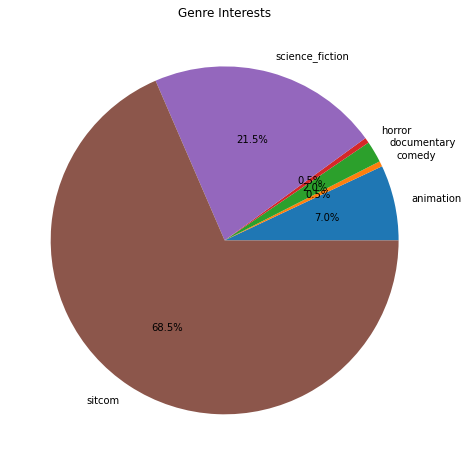

In [37]:
plt.figure(figsize=(12,8))
plt.pie(genre_counts,labels = genre_counts.index,autopct='%1.1f%%')
plt.title('Genre Interests')
plt.show()

## Seaborn Again

In [38]:
import seaborn as sns

- Given more data, these plot must make more sense

<AxesSubplot:xlabel='genre', ylabel='day_hours'>

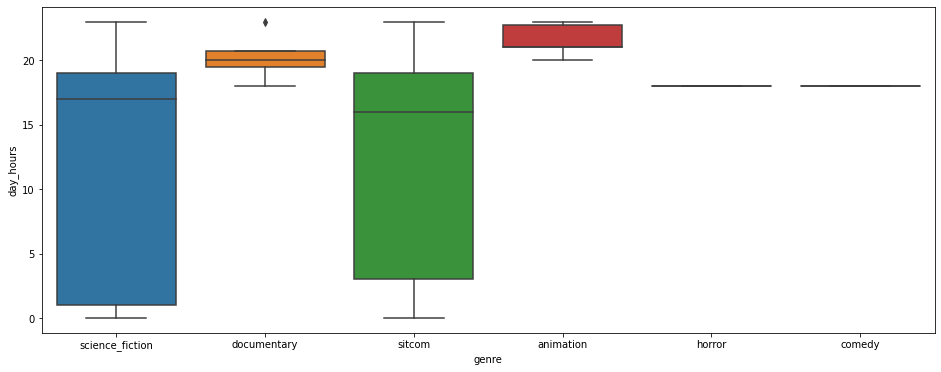

In [39]:
#genre vs day-hours
plt.figure(figsize=(16,6))
sns.boxplot(data = df, x = 'genre',y = 'day_hours')

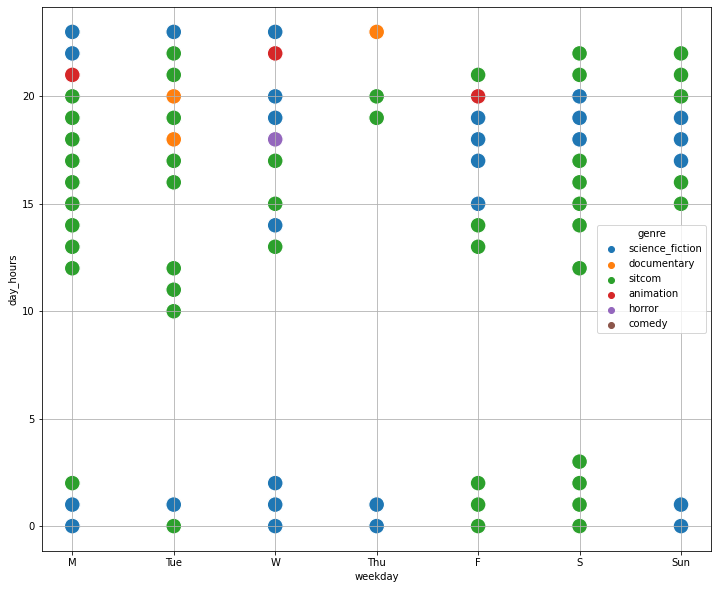

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x = 'weekday',y = 'day_hours',hue = 'genre',s = 250,alpha=1)
plt.xticks(ticks = np.arange(0,7),labels = days)
plt.grid()
plt.show()